In [1]:
%matplotlib inline

import numpy as np
import xarray as xr
import matplotlib.dates as mdates
import datetime as dt
import scipy
import matplotlib
import matplotlib.pyplot as plt

import cmocean.cm as cmo

In [2]:
datasource = "../data/AtlanticShores_main.nc"
winddata   = "../data/AtlanticShores_winds.nc"
currdata   = "../data/AtlanticShores_currents.nc"

In [3]:
df = xr.open_dataset(datasource)
ds = xr.open_dataset(winddata)
dc = xr.open_dataset(currdata)

In [4]:
tnum = mdates.date2num(df.time)
begin = mdates.date2num(dt.datetime(2020,7,9,12))
finish = mdates.date2num(dt.datetime(2020,7,12,12))

myFmt = mdates.DateFormatter('%m/%d\n%H:%M')

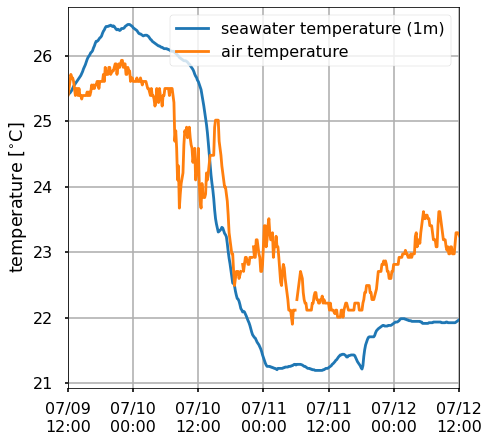

In [5]:
plt.style.use('seaborn-poster')
fig = plt.figure(figsize=(7,7))
plt.plot(df.time, df.sea_water_temperature_at_1m, label='seawater temperature (1m)')
#plt.plot(tnum, df.sea_water_temperature_at_2m, label='seawater 2m')

plt.plot(df.time, df.air_temperature, label='air temperature')
plt.legend()
plt.ylabel('temperature [$^{\circ}$C]')
plt.gca().xaxis.set_major_formatter(myFmt)
plt.xlim([begin,finish])
plt.grid()

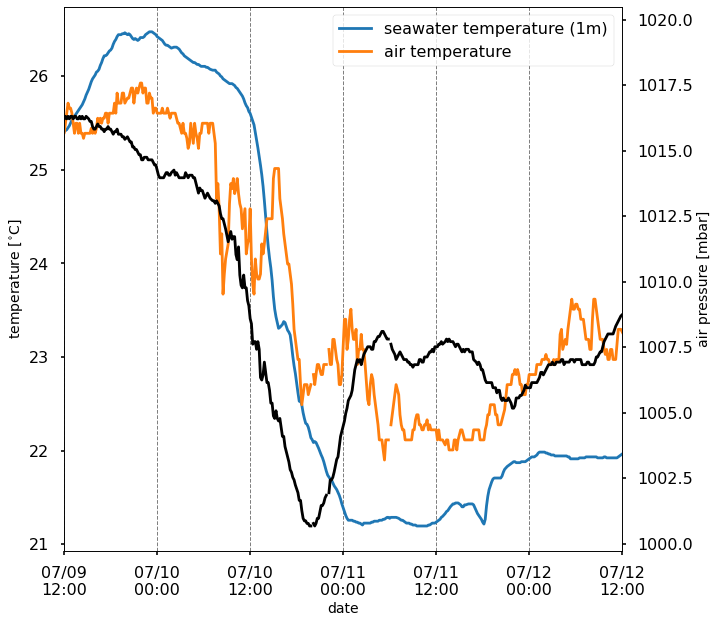

In [6]:
fig,ax = plt.subplots(figsize=(10,10))
ax.plot(df.time, df.sea_water_temperature_at_1m, label='seawater temperature (1m)')
ax.plot(df.time, df.air_temperature, label='air temperature')
ax.legend(loc=1)
# set x-axis label
ax.set_xlabel("date",fontsize=14)
# set y-axis label
ax.set_ylabel("temperature [$^{\circ}$C]",color="k",fontsize=14)
plt.grid(which='both', axis='x', color='gray', linestyle='--', linewidth=1)

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(df.time, df.air_pressure, label='air pressure',color="k")
ax2.set_ylabel("air pressure [mbar]",color="k",fontsize=14)


plt.gca().xaxis.set_major_formatter(myFmt)
plt.xlim([begin,finish])

# save the plot as a file
plt.savefig('fay_AtlanticShoresData.png', bbox_inches='tight', dpi=200)
plt.show()

In [21]:
b = np.nanmin(df.air_pressure.values)
keye = np.where(df.air_pressure.values == b)[0][0]
eyepassage = mdates.date2num(df.time[keye])

(18452.5, 18455.5)

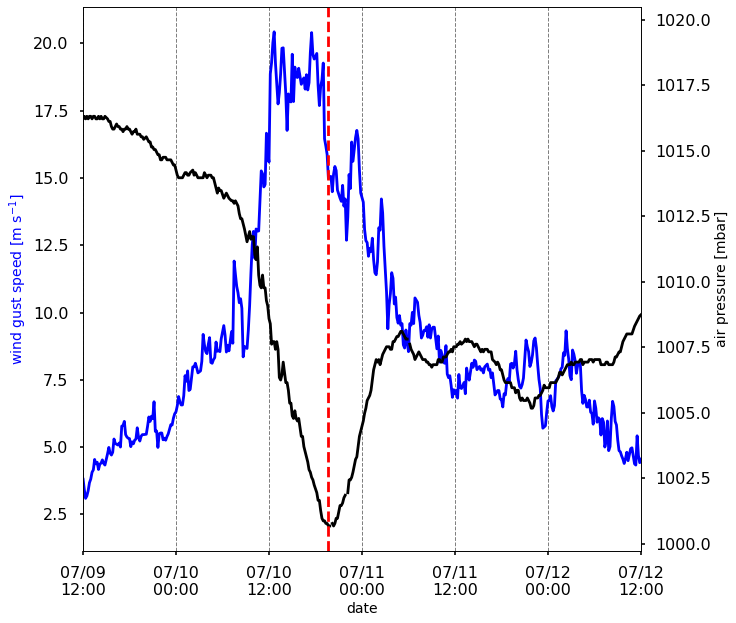

In [23]:
fig,ax = plt.subplots(figsize=(10,10))
ax.plot(df.time, df.wind_speed_of_gust, color='b')
# set x-axis label
ax.set_xlabel("date",fontsize=14)
# set y-axis label
ax.set_ylabel("wind gust speed [m s$^{-1}$]",color="b",fontsize=14)
plt.grid(axis='x', color='gray', linestyle='--', linewidth=1)

ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(df.time, 1*df.air_pressure, label='air pressure',color="k")
ax2.set_ylabel("air pressure [mbar]",color="k",fontsize=14)
#ax2.plot(df.time, df.air_temperature, label='air pressure',color="r")
#ax2.set_ylabel("air temperature [$^{\circ}$C]",color="r",fontsize=14)
plt.axvline(x = eyepassage, c='r', linestyle="--")

plt.gca().xaxis.set_major_formatter(myFmt)
plt.xlim([begin,finish])

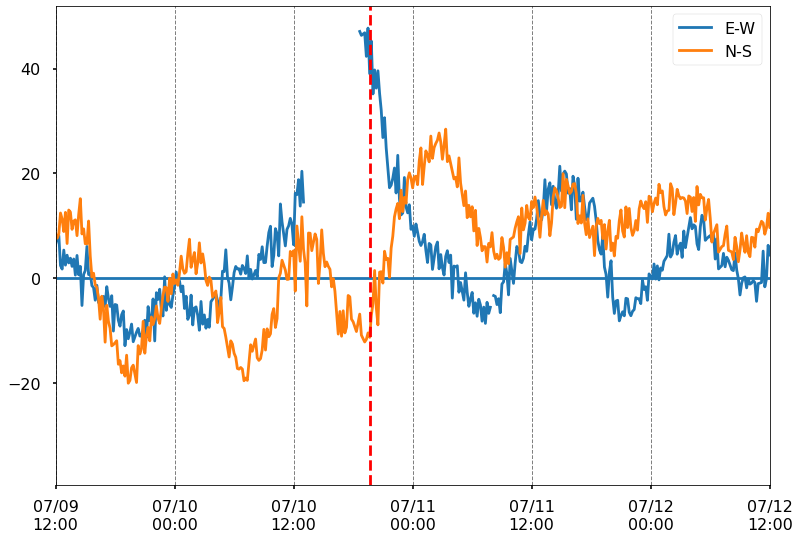

In [24]:
plt.plot(dc.time[2::34], dc.sea_water_speed[2::34].values*np.cos(np.deg2rad(dc.sea_water_velocity_to_direction[2::34].values)), label='E-W')
plt.plot(dc.time[25::34], dc.sea_water_speed[25::34].values*np.cos(np.deg2rad(dc.sea_water_velocity_to_direction[25::34].values)), label='N-S')
plt.legend()
plt.gca().xaxis.set_major_formatter(myFmt)
plt.grid(axis='x', color='gray', linestyle='--', linewidth=1)
plt.xlim([begin,finish])
plt.hlines(0,xmin=begin, xmax=finish)
plt.axvline(x = eyepassage, c='r', linestyle="--")
plt.show()

In [26]:
vellen = len(dc.sea_water_speed[::34].values)

cross_shelf_u = np.ones((34,vellen))
u_angle       = np.ones((34,vellen))
along_shelf_v = np.ones((34,vellen))
coast_angle   = 0

for i in range(34):
    cross_shelf_u[i,:] = dc.sea_water_speed[i::34].values*np.cos(np.deg2rad(dc.sea_water_velocity_to_direction[i::34].values + coast_angle))
    u_angle[i,:]       = np.mod(np.deg2rad(dc.sea_water_velocity_to_direction[i::34].values + coast_angle),2*np.pi)
    along_shelf_v[i,:] = dc.sea_water_speed[i::34].values*np.sin(np.deg2rad(dc.sea_water_velocity_to_direction[i::34].values + coast_angle))
    
depths = -1*(np.arange(34)+3)
times  = mdates.date2num(dc.time[::34])

/Users/cew145/miniconda3/envs/pangeo/lib/python3.6/site-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  """Entry point for launching an IPython kernel.


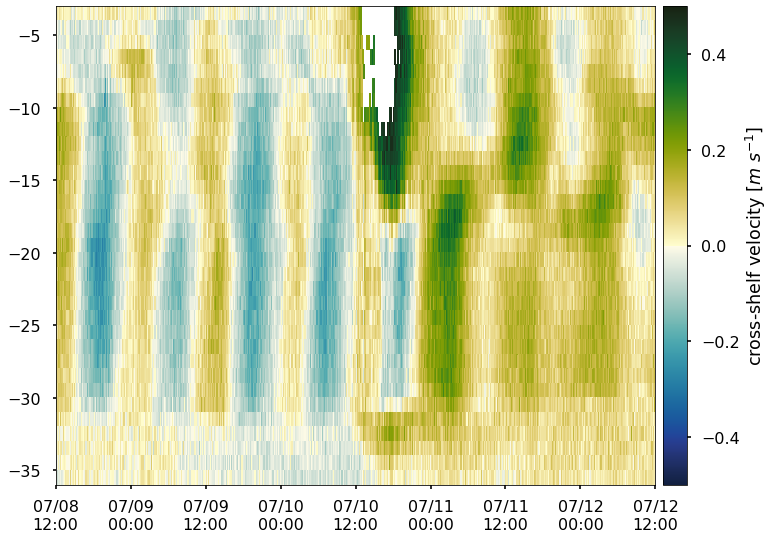

In [27]:
plt.pcolor(times, depths, cross_shelf_u/100, vmax=0.5, vmin=-0.5, cmap='cmo.delta')
plt.colorbar(pad=0.01, label="cross-shelf velocity [$m$ $s^{-1}$]")
plt.xlim([begin-1,finish])
plt.gca().xaxis.set_major_formatter(myFmt)
# save the plot as a file
plt.savefig('fay_AtlanticShores_crossshore_u.png', bbox_inches='tight', dpi=200)
plt.show()

/Users/cew145/miniconda3/envs/pangeo/lib/python3.6/site-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  """Entry point for launching an IPython kernel.


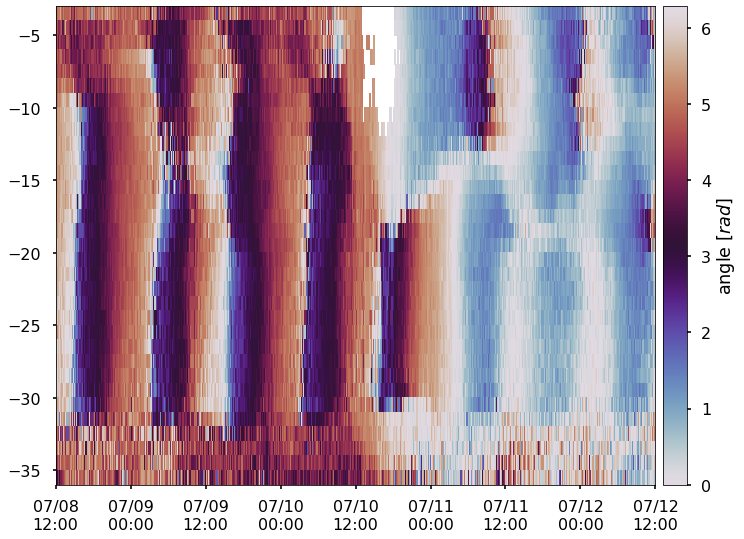

In [28]:
plt.pcolor(times, depths, u_angle, vmax=2*np.pi, vmin=0, cmap='twilight')
plt.colorbar(pad=0.01, label="angle [$rad$]")
plt.xlim([begin-1,finish])
plt.gca().xaxis.set_major_formatter(myFmt)
# save the plot as a file
# plt.savefig('fay_AtlanticShores_u_angle.png', bbox_inches='tight', dpi=200)
plt.show()

In [29]:
dudz = np.gradient(cross_shelf_u,axis=0)/100
dvdz = np.gradient(along_shelf_v,axis=0)/100
S2   = dudz**2 + dvdz**2

/Users/cew145/miniconda3/envs/pangeo/lib/python3.6/site-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  """Entry point for launching an IPython kernel.


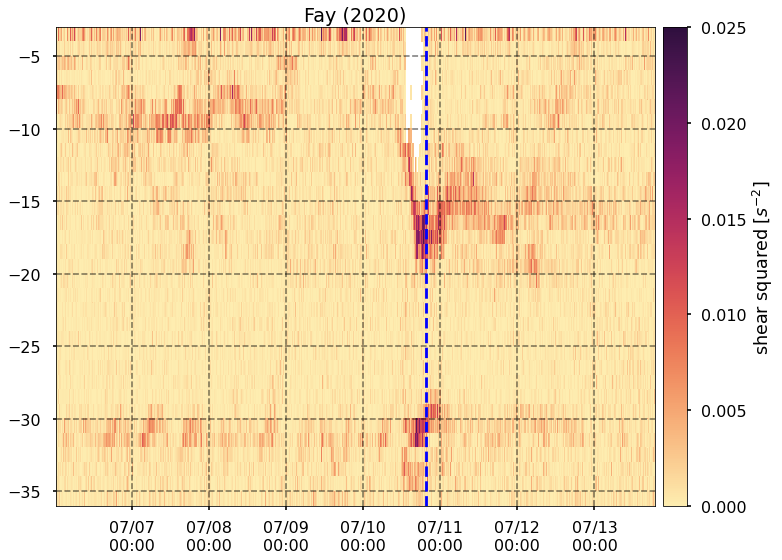

In [40]:
plt.pcolor(times, depths, S2, vmax=0.025, vmin=0, cmap='cmo.matter')
plt.title('Fay (2020)')
plt.colorbar(pad=0.01, label="shear squared [$s^{-2}$]")
#plt.xlim([begin,finish])
plt.gca().xaxis.set_major_formatter(myFmt)
plt.grid(c='k', linestyle='--', alpha=0.5)
plt.axvline(x = eyepassage, c='b', linestyle="--")
# save the plot as a file
plt.savefig('fay_AtlanticShores_S2.png', bbox_inches='tight', dpi=200)
plt.show()

In [41]:
np.where(S2 > 0.02)

(array([ 0,  0,  0,  0,  0,  0,  0, 13, 13, 14, 27, 27, 28]),
 array([245, 249, 356, 390, 397, 472, 734, 648, 658, 658, 626, 645, 644]))

/Users/cew145/miniconda3/envs/pangeo/lib/python3.6/site-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  """Entry point for launching an IPython kernel.


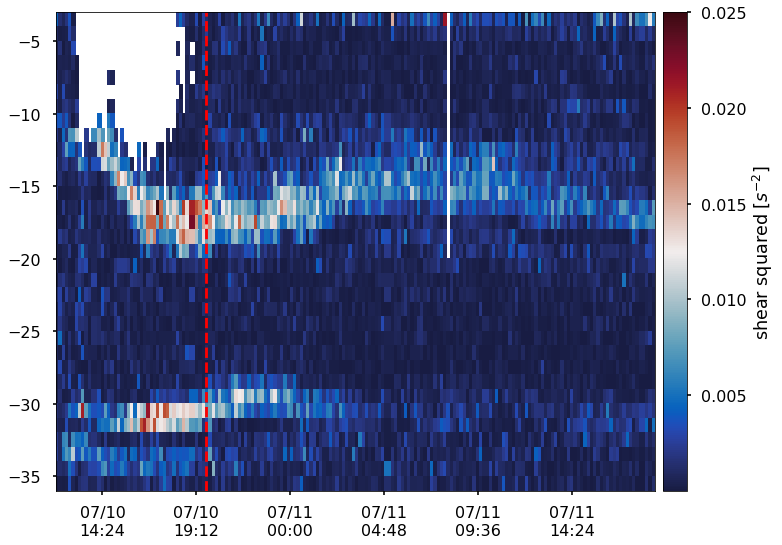

In [58]:
plt.pcolor(times[648-30:648+150], depths[:], S2[:,648-30:648+150], cmap='cmo.balance', vmax=0.025)
plt.colorbar(pad=0.01, label="shear squared [$s^{-2}$]")
plt.axvline(x = eyepassage, c='r', linestyle="--")
plt.gca().xaxis.set_major_formatter(myFmt)

In [59]:
ds.altitude[::11]

wind_10m = ds.wind_speed.values[::11]
dirr_10m = ds.wind_from_direction.values[::11]
tnum_10m = mdates.date2num(ds.time[::11])

In [60]:
rmax = 80/(60*24) ## 3 hour filter

filtered_10mWind = np.ones_like(wind_10m)
filtered_10mDirr = np.ones_like(wind_10m)
for i, windspeed in enumerate(wind_10m[:]):
    r = np.abs(tnum_10m - tnum_10m[i])/rmax
    Q = np.where(np.greater_equal(1,r))
    r = r[Q]
    w = (1-r**3)**3
    d = wind_10m[Q]
    p = dirr_10m[Q]

    filtered_10mWind[i] = np.nanmedian(d) # np.nansum(d * w)/np.nansum(w)
    filtered_10mDirr[i] = np.nanmedian(p) # np.nansum(p * w)/np.nansum(w)

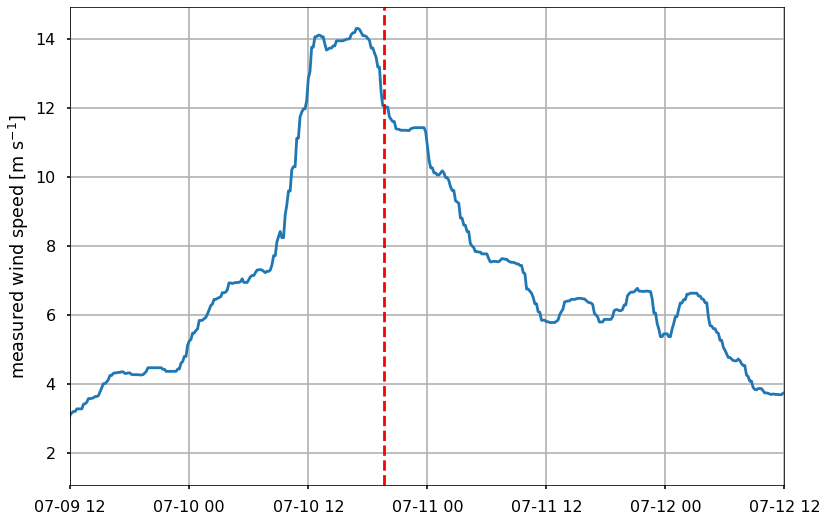

In [63]:
plt.plot(ds.time[::11], filtered_10mWind)
plt.xlim([begin,finish])
plt.ylabel('measured wind speed [m s$^{-1}$]')
plt.grid()
plt.axvline(x = eyepassage, c='r', linestyle="--")

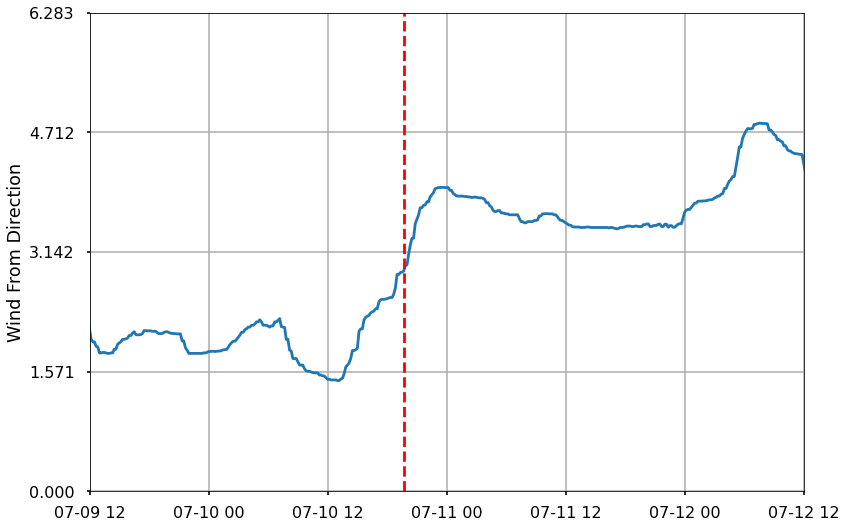

In [62]:
winddirr = ds.wind_from_direction

#plt.plot(ds.time, (winddirr))
plt.plot(ds.time[::11], filtered_10mDirr/180 * np.pi)
plt.ylabel("Wind From Direction")
plt.xlim([begin,finish])
plt.axvline(x = eyepassage, c='r', linestyle="--")
plt.ylim([0, 2*np.pi])
plt.yticks(np.linspace(0,2*np.pi,5))
plt.grid()